### Objective:
To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

#### Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers? 

#### Data Description:
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

#### Steps to follow:
1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)
2. Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)
3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)
4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)
5. Calculateaveragesilhouettescoreforbothmethods.(5marks)
6. Compare K-means clusters with Hierarchical clusters. (5 marks)
7. Analysis the clusters formed, tell us how is one cluster different from another and
 answer all the key questions. (10 marks)

### Importing necessary libraries 

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.spatial.distance import cdist

# Importing sklearn libraries
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import fcluster
from sklearn.model_selection import train_test_split

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist 

# Display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format  

# Increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Update default style and size of charts
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [20, 20]

In [34]:
# loading the dataset 
credit_card = pd.read_excel("Credit Card Customer Data.xlsx")

In [35]:
# Displaying first 5 rows of data
credit_card.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [36]:
# Shape of the data
credit_card.shape

(660, 7)

In [37]:
# info of the dataset (null values and datatypes)
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


We can see there is no null values in the dataset and the data type is integer only.

In [38]:
# Checking missing values
credit_card.isna().all()

Sl_No                  False
Customer Key           False
Avg_Credit_Limit       False
Total_Credit_Cards     False
Total_visits_bank      False
Total_visits_online    False
Total_calls_made       False
dtype: bool

There is no missing values in the dataset.

In [39]:
# Statistics measurement of the dataset
credit_card.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.00,330.50,190.67,1.00,165.75,330.50,495.25,660.00
Customer Key,660.00,"55,141.44","25,627.77","11,265.00","33,825.25","53,874.50","77,202.50","99,843.00"
Avg_Credit_Limit,660.00,"34,574.24","37,625.49","3,000.00","10,000.00","18,000.00","48,000.00","200,000.00"
Total_Credit_Cards,660.00,4.71,2.17,1.00,3.00,5.00,6.00,10.00
Total_visits_bank,660.00,2.40,1.63,0.00,1.00,2.00,4.00,5.00
Total_visits_online,660.00,2.61,2.94,0.00,1.00,2.00,4.00,15.00
Total_calls_made,660.00,3.58,2.87,0.00,1.00,3.00,5.00,10.00


In [117]:
# Dropping unwanted clumns
#d1_creditCard = credit_card.drop(["Sl_No", "Customer Key"], axis = 1)
#d1_creditCard.head()

### Univariate analysis

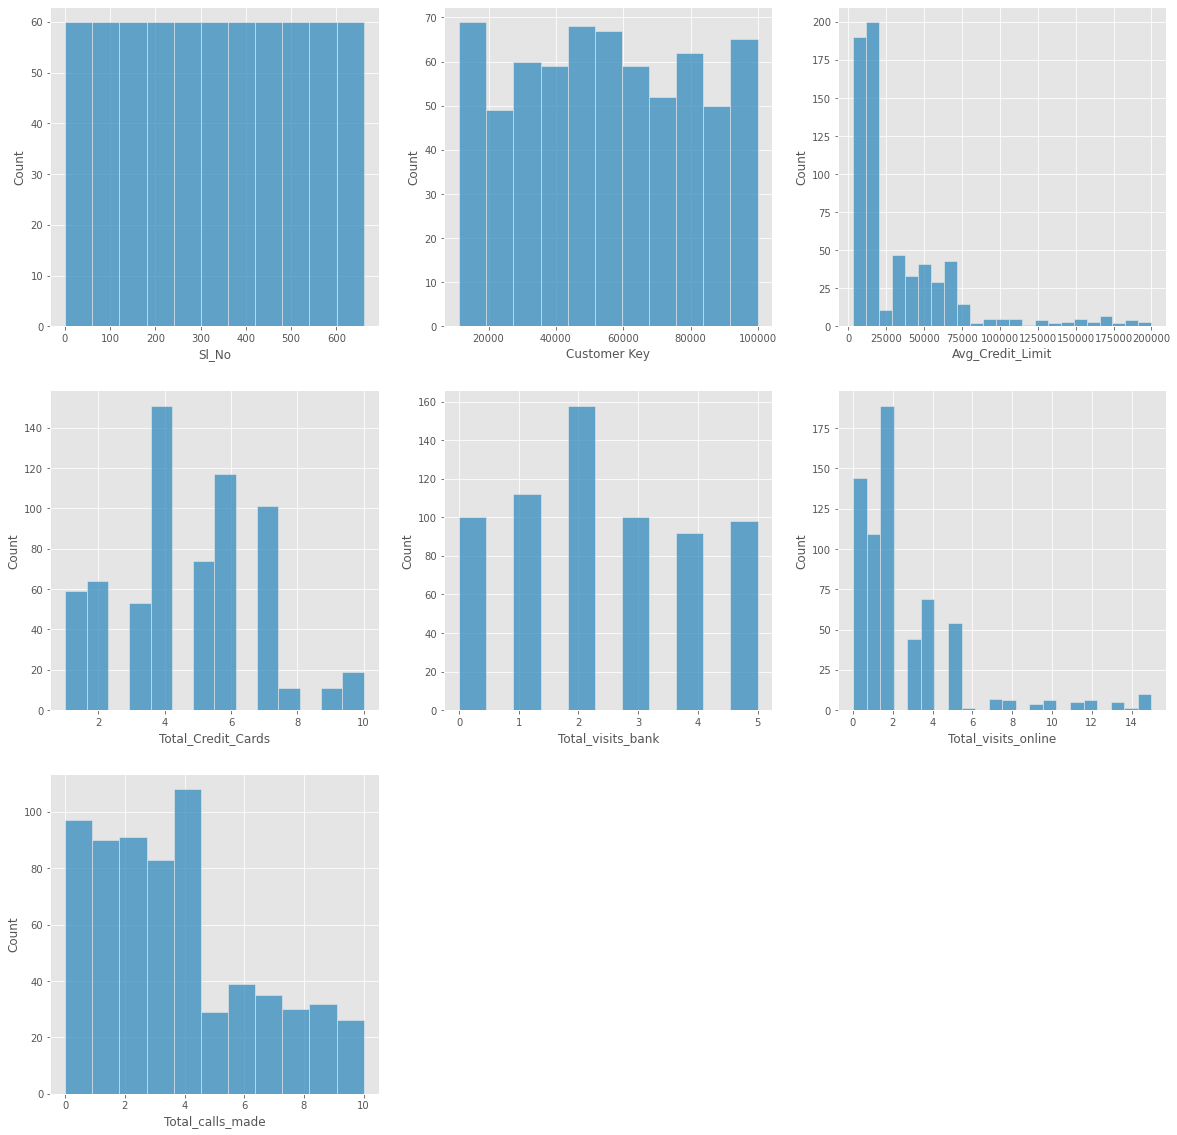

In [118]:
# Histogram of all the columns in the dataset
for i, column in enumerate(credit_card.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(credit_card[column])

In [119]:
# Skewness in the dataset can be calculated as;
credit_card.skew().sort_values(ascending=False)

Total_visits_online   2.23
Avg_Credit_Limit      2.20
Total_calls_made      0.66
Total_Credit_Cards    0.14
Total_visits_bank     0.14
Customer Key          0.05
Sl_No                 0.00
dtype: float64

We can observe there are some skewness in "Avg_Credit_LImit", "Total_visits_online" and "Total_calls_made" columns.

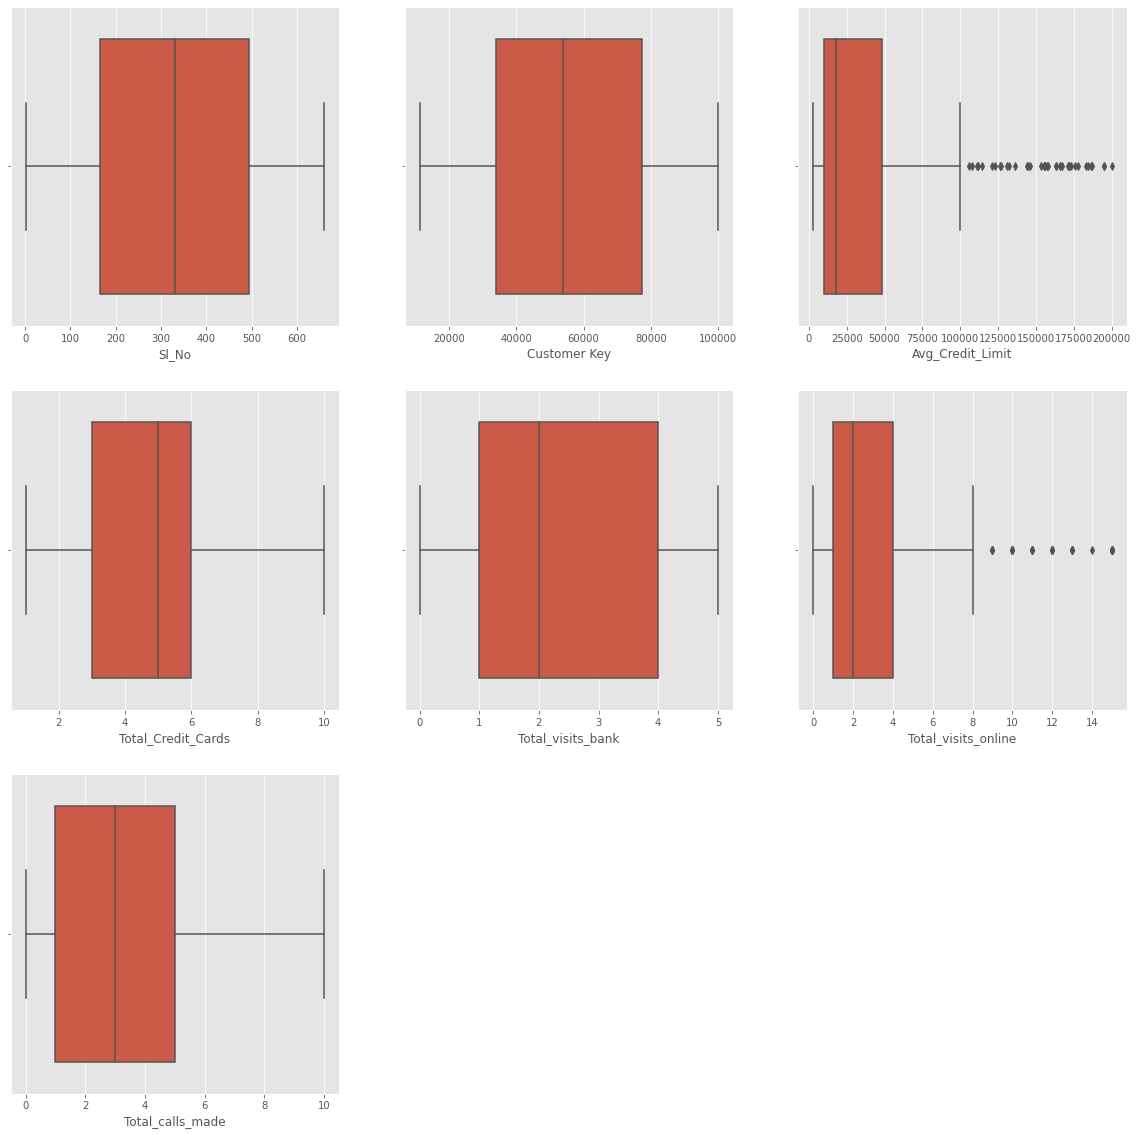

In [120]:
# lets visualize the columns in boxplots to find out if there are outliers present in dataset.
for j, column in enumerate(credit_card.columns):
    plt.subplot(3, 3, j+1)
    sns.boxplot(x = credit_card[column]);
    j += 1

As we can see there are some outliers present in columns "Avg_Credit_Limit" and "Total_visits_online".

##### Analysis of univariate plots:
A. There are some skewness in "Avg_Credit_LImit", "Total_visits_online" and "Total_calls_made" columns.

B. there are some outliers present in columns "Avg_Credit_Limit" and "Total_visits_online".

C. The skewness present in dataset might be due to presence of outliers in some columns.

D. We can apply normalize the data by applying Z-score to the dataset. The normalize scale of the variables can handle the outliers present in some columns.


In [121]:
# Data scaling by applying Z-score,
scaled_creditCard = credit_card.apply(zscore)
scaled_creditCard.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-1.73,1.25,1.74,-1.25,-0.86,-0.55,-1.25
1,-1.72,-0.65,0.41,-0.79,-1.47,2.52,1.89
2,-1.72,-1.48,0.41,1.06,-0.86,0.13,0.15
3,-1.71,-0.57,-0.12,0.14,-0.86,-0.55,0.15
4,-1.71,-0.30,1.74,0.60,-1.47,3.20,-0.20


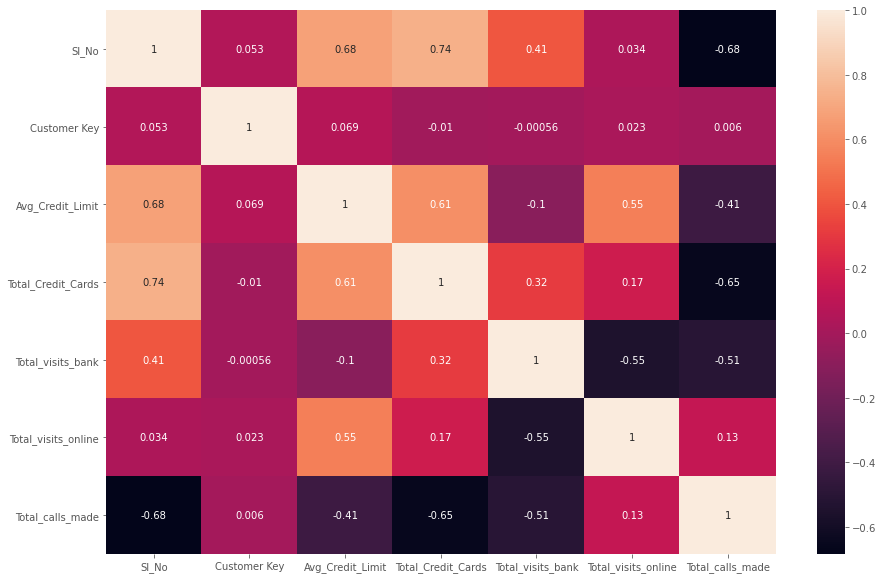

In [122]:
# lets visualize the correlation in heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(scaled_creditCard.corr(), annot=True)
plt.show()

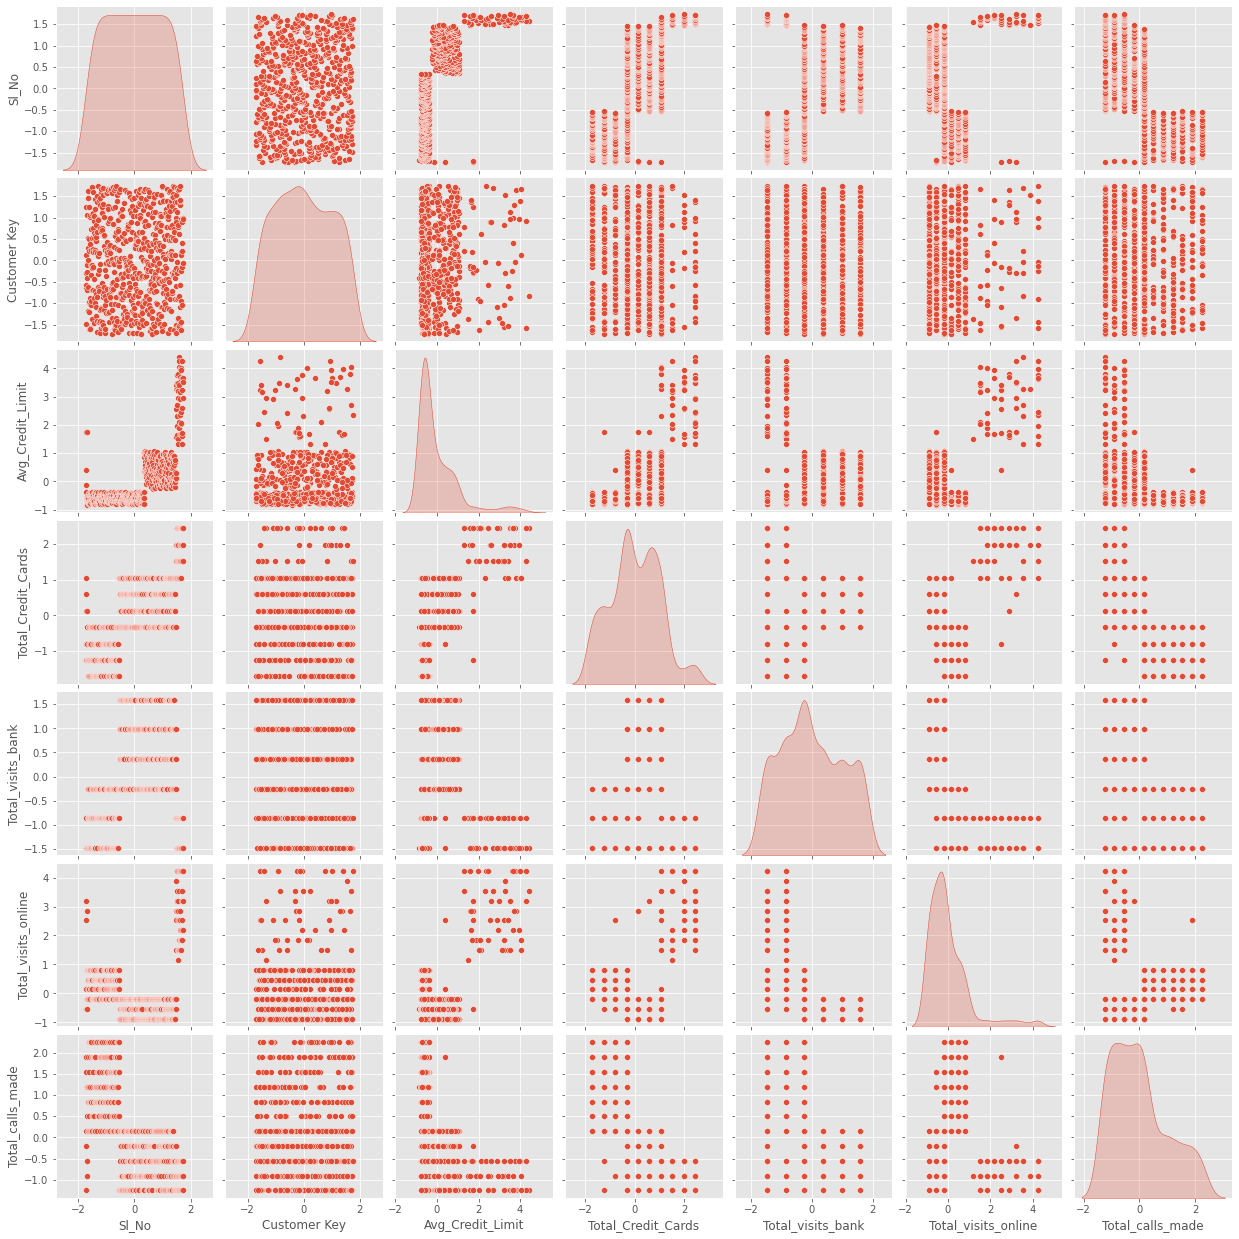

In [123]:
# Pair plot
sns.pairplot(scaled_creditCard,diag_kind ="kde")
plt.show()

##### Analysis of heat map and pair plot,
A. There is high correlation between "Avg_Credit_Limit" and "Total_Credit_Cards" that means people having more credit cards tend to have high credit   limit.

B. Also there is high comparatively high correlation between "Total_visits_bank" and "Total_Credit_Cards" which mean people with more number of credit cards visits bank more often.

C. There is negative correlation between "Total_Credit_Cards" and "Total_calls_made".

In [125]:
# Droping variables that wouldn't impact K-means clusturing
creditCard_kc = credit_card.iloc[:,2:]
creditCard_kc.head()

creditCard_scaled_kc = scaled_creditCard.iloc[:,2:]
creditCard_scaled_kc.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.74,-1.25,-0.86,-0.55,-1.25
1,0.41,-0.79,-1.47,2.52,1.89
2,0.41,1.06,-0.86,0.13,0.15
3,-0.12,0.14,-0.86,-0.55,0.15
4,1.74,0.60,-1.47,3.20,-0.20


### K-means clustering using elbow plot 

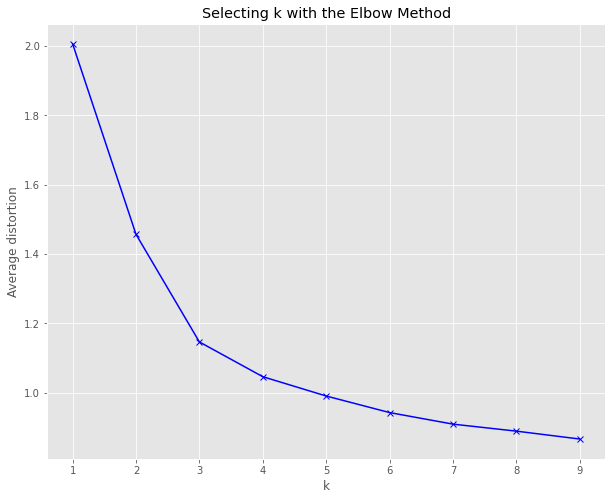

In [126]:
# Optimal number of clusters by using knee test
clusters = range(1,10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(creditCard_scaled_kc)
    prediction = model.predict(creditCard_scaled_kc)
    meanDistortions.append(sum(np.min(cdist(creditCard_scaled_kc, model.cluster_centers_, "euclidean"), axis=1)) / creditCard_scaled_kc.shape[0])

plt.figure(figsize = (10, 8))
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

###### Observation
From the above graph we can see that there is noticeblae bend at k = 3. So the optimal number of clustures would be 3.

In [140]:
# Applying k =3 to run sensitives on the data
final_model = KMeans(3)
final_model.fit(creditCard_scaled_kc)
prediction=final_model.predict(creditCard_scaled_kc)

# Appending the prediction on raw dataset
creditCard_kc["Group"] = prediction

# Appending the prediction on scaled dataset
creditCard_scaled_kc["Group"] = prediction

print("Groups assigned : \n")
creditCard_kc.head()

Groups assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2


In [141]:
# Number of unique elements in the dataset
creditCard_kc.nunique()

Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
Group                    3
dtype: int64

We can observe the new column "Group" has been added to the dataset with three clustures: "0", "1", "2"

In [142]:
# Analyzing the distribution of the data among into the 3 clusters using group by function
creditCard_clusKc = creditCard_kc.groupby(["Group"])
creditCard_clusKc.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group,,,,,
0,"33,782.38",5.52,3.49,0.98,2.00
1,"12,174.11",2.41,0.93,3.55,6.87
2,"141,040.00",8.74,0.60,10.90,1.08


#### Analysing clustures using boxplot

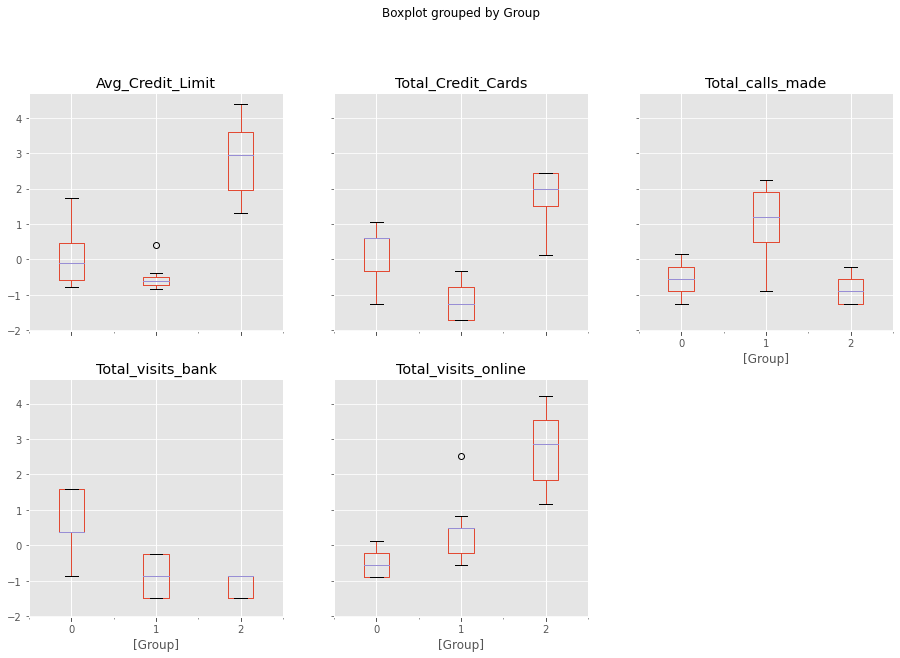

In [143]:
# Visualizing clustures using box plot on scaled data
creditCard_scaled_kc.boxplot(by = "Group", layout = (3,3),figsize=(15, 15))
plt.show()

### Hierarchical clustering (with different linkages)

In [146]:
# Droping variables that wouldn't impact Hierarchical clusturing
creditCard_hc = credit_card.iloc[:,2:]
creditCard_hc.head()

creditCard_scaled_hc = scaled_creditCard.iloc[:,2:]
creditCard_scaled_hc.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.74,-1.25,-0.86,-0.55,-1.25
1,0.41,-0.79,-1.47,2.52,1.89
2,0.41,1.06,-0.86,0.13,0.15
3,-0.12,0.14,-0.86,-0.55,0.15
4,1.74,0.60,-1.47,3.20,-0.20


In [179]:
Hc_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
Hc_model.fit(creditCard_scaled_hc)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [234]:
# Appending the prediction on raw dataset
creditCard_hc["Labels"] = Hc_model.labels_

# Appending the prediction on scaled dataset
creditCard_scaled_hc["Labels"] = Hc_model.labels_

creditCard_hc.head(10)
creditCard_scaled_hc.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Labels
0,1.74,-1.25,-0.86,-0.55,-1.25,0
1,0.41,-0.79,-1.47,2.52,1.89,2
2,0.41,1.06,-0.86,0.13,0.15,0
3,-0.12,0.14,-0.86,-0.55,0.15,0
4,1.74,0.60,-1.47,3.20,-0.20,1


In [235]:
# Analyzing the distribution of the data among into the 3 clusters using group by function
creditCard_clusHc = creditCard_hc.groupby(["Labels"])
creditCard_clusHc.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Labels,,,,,
0,"33,782.38",5.52,3.49,0.98,2.00
1,"141,040.00",8.74,0.60,10.90,1.08
2,"12,174.11",2.41,0.93,3.55,6.87


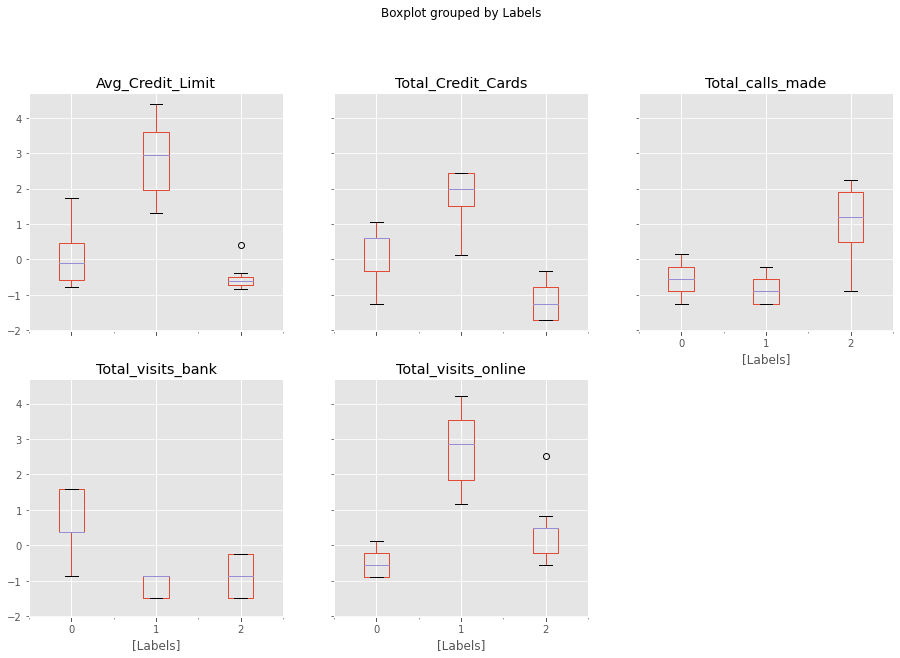

In [236]:
# Visualizing hierarchical clustures using box plot on scaled data
creditCard_scaled_hc.boxplot(by = "Labels", layout = (3,3),figsize=(15, 15))
plt.show()

#### Hierarchical clusturing using cophenetic coeff.

In [237]:
# Using Euclidian as distance and linkage metric as average
# generating the linkage matrix
Z = linkage(creditCard_scaled_hc, metric = "euclidean", method = "average") 
c, coph_dists = cophenet(Z , pdist(creditCard_scaled_hc))

# Cophenet index
c

0.9250834137612217

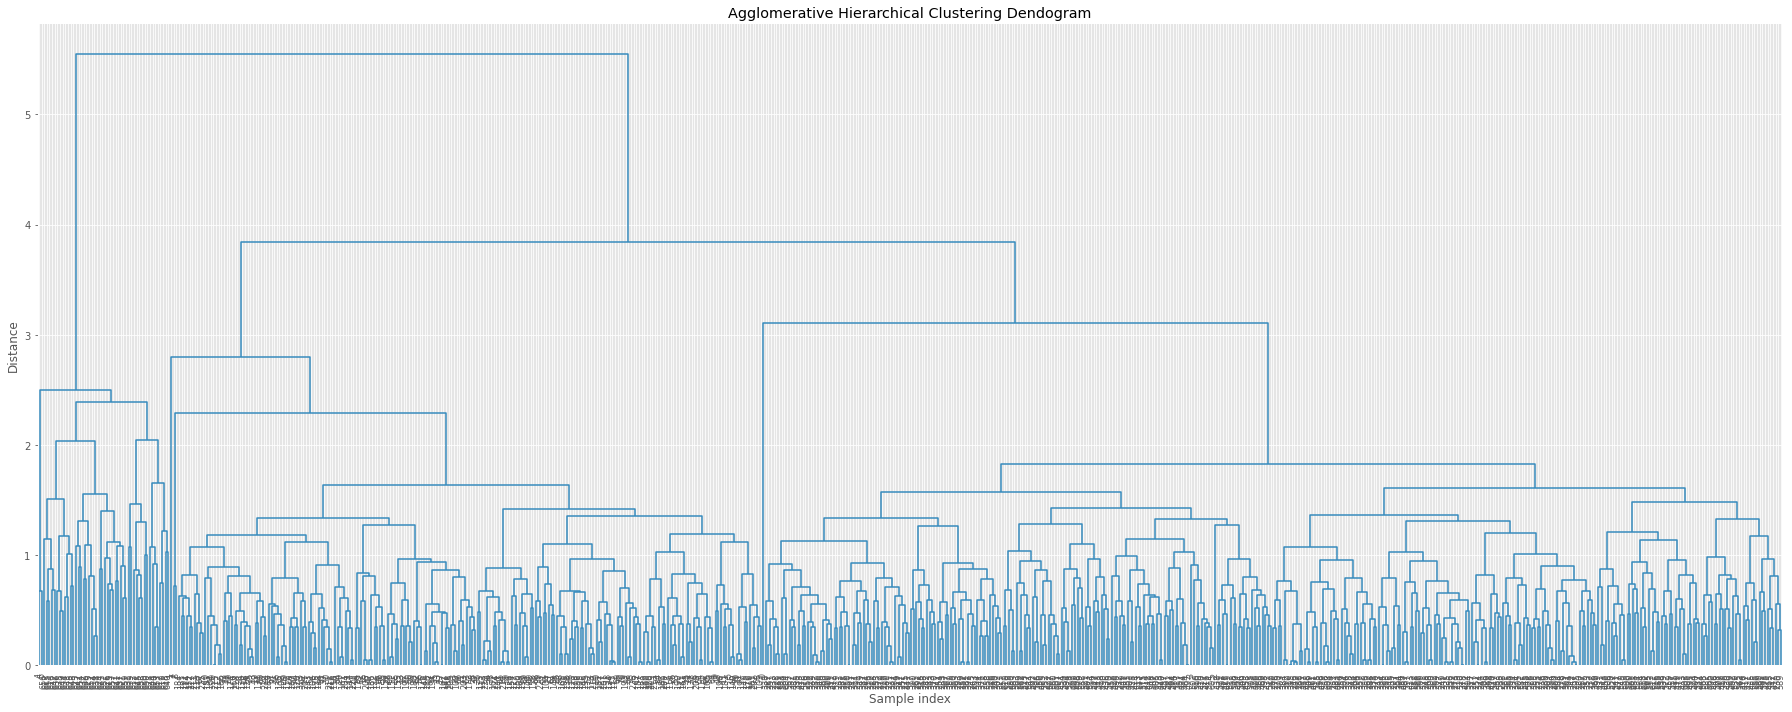

In [238]:
# Printing dendogram for the average linkage method
plt.figure(figsize = (25, 10))
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
dendrogram(Z, leaf_rotation = 90., color_threshold = 40, leaf_font_size = 8 )
plt.tight_layout()

In [239]:
# Using Euclidian as distance and linkage metric as complete
# generating the linkage matrix
Z = linkage(creditCard_scaled_hc, metric = "euclidean", method = "complete") 
c, coph_dists = cophenet(Z , pdist(creditCard_scaled_hc))

# Cophenet index
c

0.8965261555242725

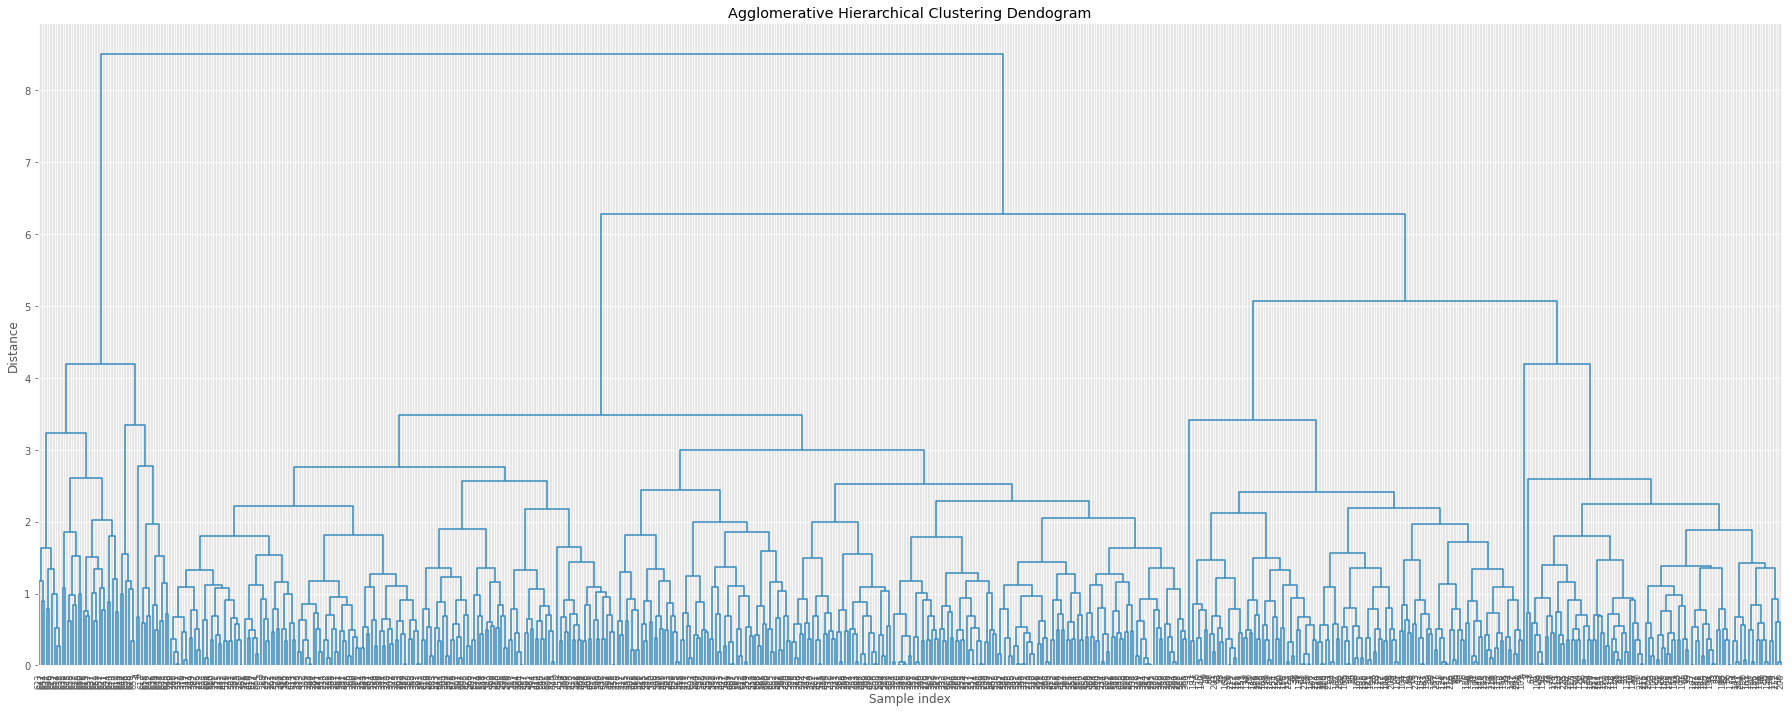

In [240]:
# Printing dendogram for the complete linkage method
plt.figure(figsize = (25, 10))
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
dendrogram(Z, leaf_rotation = 90., color_threshold = 40, leaf_font_size = 8 )
plt.tight_layout()

In [263]:
# Using Euclidian as distance and linkage metric as single
# generating the linkage matrix
Z = linkage(creditCard_scaled_hc, metric = "euclidean", method = "single") 
c, coph_dists = cophenet(Z , pdist(creditCard_scaled_hc))

# Cophenet index
c

0.8452796130290009

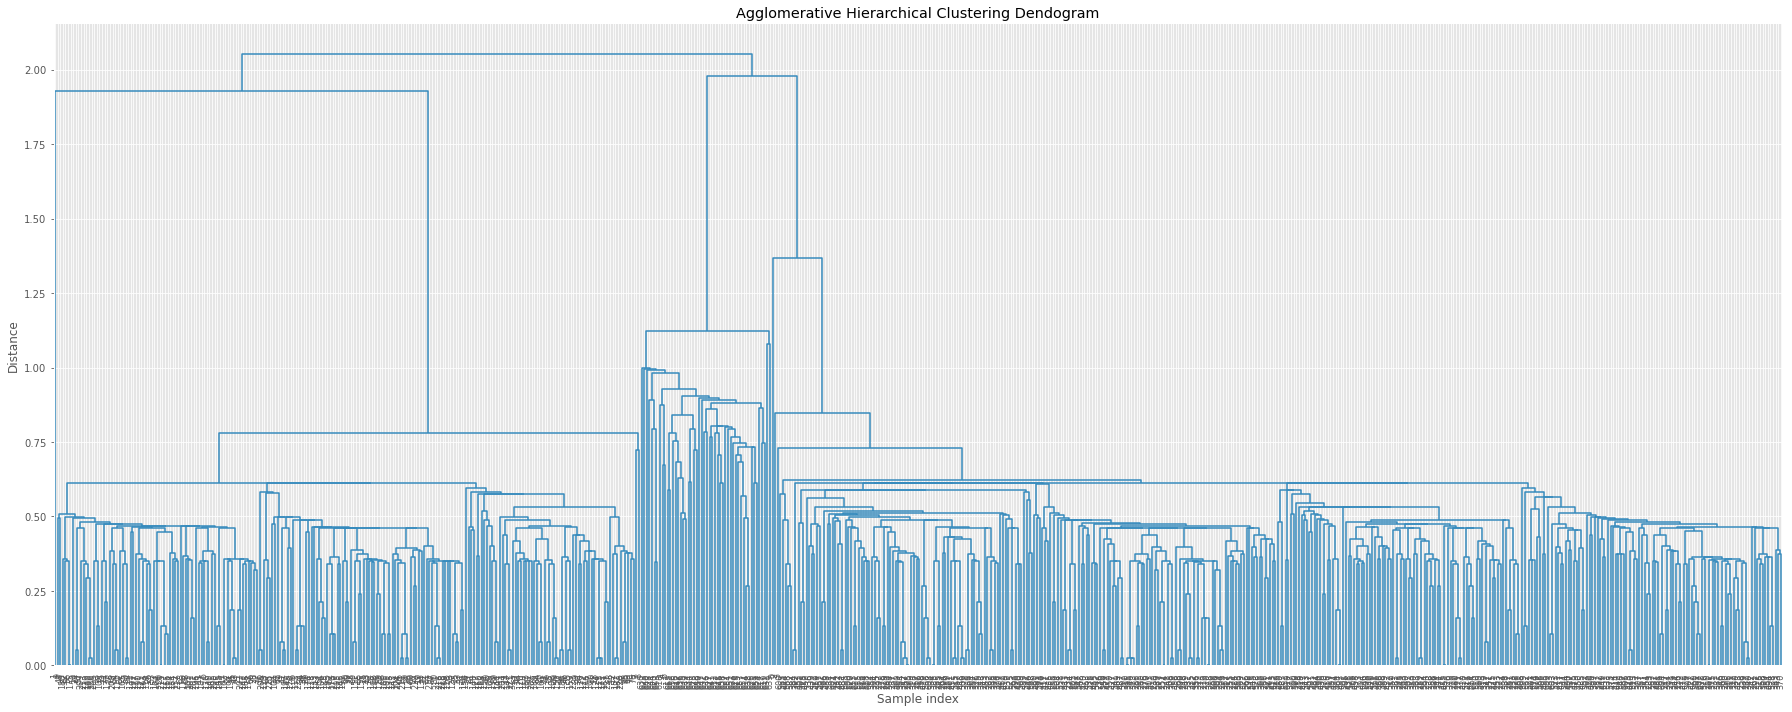

In [264]:
# Printing dendogram for the single linkage method
plt.figure(figsize = (25, 10))
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
dendrogram(Z, leaf_rotation = 90., color_threshold = 40, leaf_font_size = 8 )
plt.tight_layout()

In [241]:
# Using Euclidian as distance and linkage metric as ward
# generating the linkage matrix
Z = linkage(creditCard_scaled_hc, metric = "euclidean", method = "ward") 
c, coph_dists = cophenet(Z , pdist(creditCard_scaled_hc))

# Cophenet index
c

0.8165335196932614

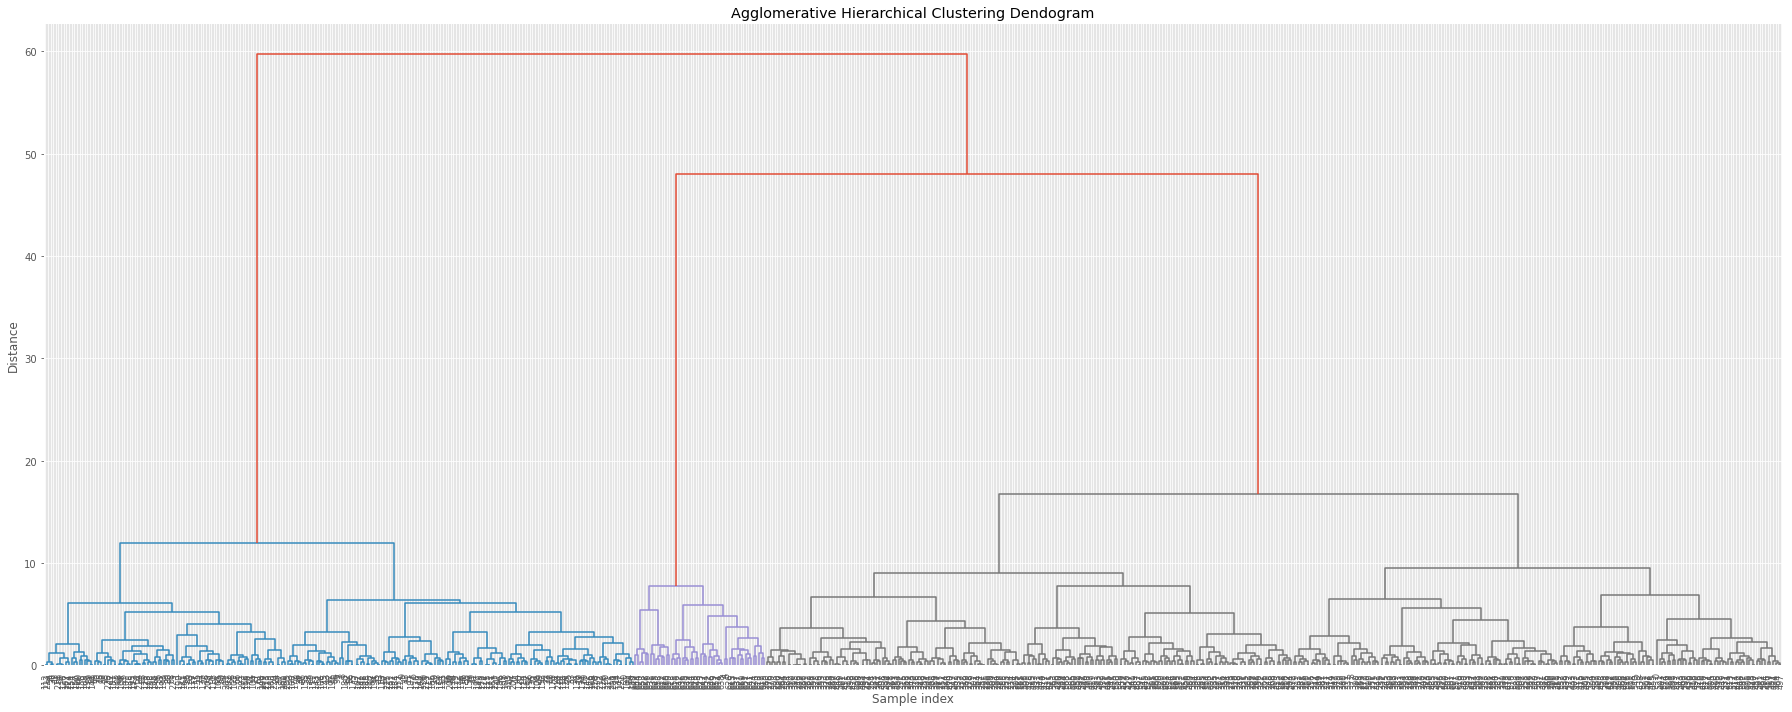

In [242]:
# Printing dendogram for the ward linkage method
plt.figure(figsize = (25, 10))
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
dendrogram(Z, leaf_rotation = 90., color_threshold = 40, leaf_font_size = 8 )
plt.tight_layout()

#### Conclusion
 Among all the methods(Average, complete, single, ward) tried, we can see that Average linkage has the highest value i.e. 0.925 which is closet to 1 among others. Thus Average linkage is the best cophenetic linkage.

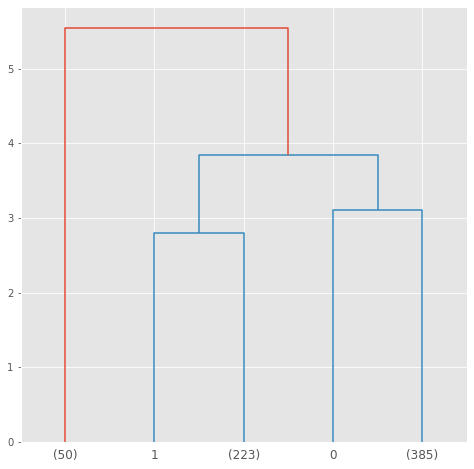

In [243]:
# Using "lastp" truncate mode in dendrogram for average linkage
Z = linkage(creditCard_scaled_hc, metric = "euclidean", method = "average") 

plt.figure(figsize=(8, 8))
dendrogram(
    Z,
    truncate_mode = "lastp",  # show only the last p merged clusters
    p = 5,  # show only the last p merged clusters
)
plt.show()


In [253]:
# Determining the Number of Clusters based on distance
# the value 3.8 produces 3 clusters
max_d = 3.8 
clusters_hc = fcluster(Z, max_d, criterion='distance')
clusters_hc

array([3, 2, 3, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

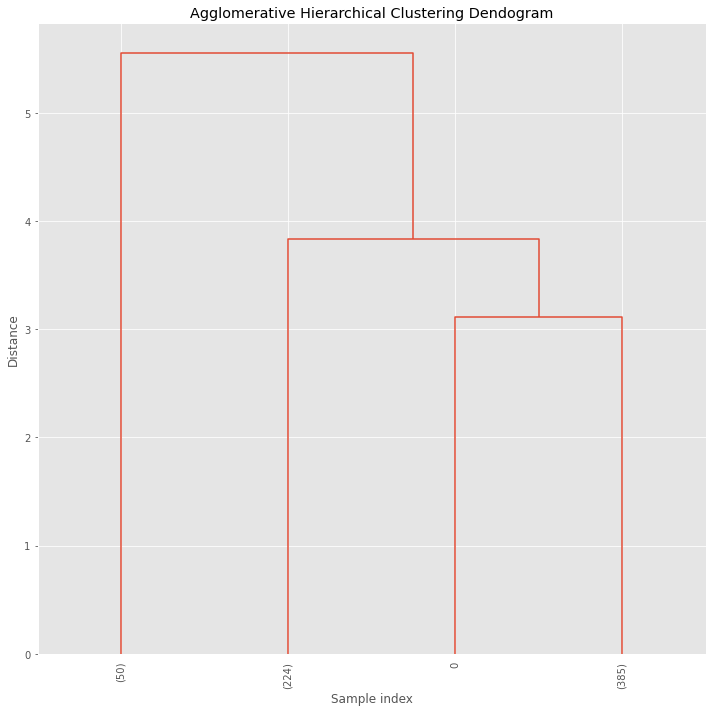

In [254]:
# Final Dendogram using the average linkage method
plt.figure(figsize = (10, 10))
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
Z = linkage(creditCard_scaled_hc, "average")
dendrogram(Z,leaf_rotation = 90.0, p = 4,color_threshold = 1.5, leaf_font_size = 10,truncate_mode = "lastp")
plt.tight_layout()

### Silhouette score for both methods

In [255]:
# Sihouette Score for K-means
SilhouetteScore_kc = silhouette_score(creditCard_scaled_kc, prediction)
SilhouetteScore_kc

0.5411228112448502

In [256]:
# Sihouette Score for hierarchical clusters
SilhouetteScore_hc = silhouette_score(creditCard_scaled_hc, clusters_hc)
SilhouetteScore_hc

0.5908634951401681

### Compare K-means clusters with Hierarchical clusters

In [257]:

# Silhouette score comparision 
scores  = [ ["K-Means", SilhouetteScore_kc], ["Hierarchical", SilhouetteScore_hc]]

Silhouette_clustering_Scores  = pd.DataFrame(scores, columns=['Clustering Method', 'Silhouette Score']) 
Silhouette_clustering_Scores.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
1,Hierarchical,0.59
0,K-Means,0.54


##### Conclusions;
- Both cluster method produces 3 clusters.
- As we can see the value of Hierarchical cluster is 0.59, and closer to 1, which is higher than the K-Means clustering. So the Hoerarchical clustering method proved to be better algorithm for desired outputs.
- For the large dataset, K-Means clustering is better suited than Hierarchical clusturing as it takes very long time, expensive and complex computational process.

In [265]:
# Analyzing the distribution of the data among into the 3 clusters using group by function
creditCard_clusHc = creditCard_hc.groupby(["Labels"])
creditCard_clusHc.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Labels,,,,,
0,"33,782.38",5.52,3.49,0.98,2.00
1,"141,040.00",8.74,0.60,10.90,1.08
2,"12,174.11",2.41,0.93,3.55,6.87


### Cluster analysis
#### Key questions:

##### How many different segments of customers are there?
  
  There are three segements of customers,
  - Segment 0
  - Segment 1
  - Segment 2
  
  
##### How are these segments different from each other?
  
  Below is the explanation of each segements:
  - Segment 0:- This segment customers have second best "average credit limit" among the three segments whereas they have highest number of "total visits bank". They possesses higher number of "total credit cards" than Segment 2 customers but lesser than Segment 1 customers. Their "total online visits" is lower than others two whereas "total calls made" is higher than Segment 1 and lower than Segment 2.
   
  - Segment 1:- This segment customers have best "average credit limit" among the three segments whereas they have lowest number of "total visits bank". They possesses highest number of "total credit cards"  and "total visits online" than Segment 0 and Segment 2 customers. Their "total calls made" is lowest among segments.
   
  - Segment 2:- This segment customers have lowest "average credit limit" among the three segments whereas they have higher number of "total visits bank" than Segment 1 and lower than Segment 0. They possesses higher number of "total visits online" than Segment 1 customers but lesser than Segment 0 customers. Their "total online visits" is more than Segment 0 and lower than Segment 1 whereas "total calls made" is highest among segments.
  
##### What are your recommendations to the bank on how to better market to and service these customers?
  
  - For the Segment 0 customers, who have the highest number of bank visits, we can enhance the customer satisfaction by quickly attending as possible them and providing comfortable waiting areas where they can find some good reading materials and even the television.
  
  - For Segment 1 customers, who have the best credit limit and also possesses highest number of total credit cards, we can provide the best customer satisfaction by enhancing their online experience and also maketing the best offers via email and other forms of internet communications.
  
  - For Segment 2 customers, who have the highest number of total calls made, we can do the telemarketing by enhancing their customer experince by answering theor all queries and doubts and also providing the best offer based on their criterias. We can also focus on reducing their waiting time for the agents to speak and easily direct them to the right department they have questions for their service.
  
  
  